- ### Planteamiento del problema:

Predecir a partir de medidas diagnósticas si un paciente tiene diabetes o no.

In [18]:
# Se importa el dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
dataframe = pd.read_csv(url)

- ### Exploración y limpieza de datos:

In [19]:
# Primera apreciacion del dataset
filas = dataframe.shape[0]
columnas = dataframe.shape[1]
print(f'Filas: {filas} | Columnas: {columnas}')
print()
print(dataframe.info())

Filas: 768 | Columnas: 9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [20]:
nulos = dataframe.isnull().sum()
if len(nulos[nulos != 0]) == 0:

    print('No hay datos nulos')

else:

    print(nulos[nulos != 0])

No hay datos nulos


In [21]:
dataframe.dtypes.value_counts()

int64      7
float64    2
Name: count, dtype: int64

- Inicialmente se puede observar que no existen valores nulos en ninguna de las variables.
- Hay 768 registros y 9 variables incluyendo la variable objetivo.
- as 9 variables son numéricas.
- Se establece la variable objetivo a "Outcome".

In [22]:
# Se verifica la existencia de duplicados
duplicados = dataframe.duplicated().sum()
print(f'Existen {duplicados} registros duplicados.')
print(f'El % de registros "duplicados" es {duplicados/filas}.')

Existen 0 registros duplicados.
El % de registros "duplicados" es 0.0.


No Existen datos duplicados en el dataframe.

- ### Análisis univariante:

In [23]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspa

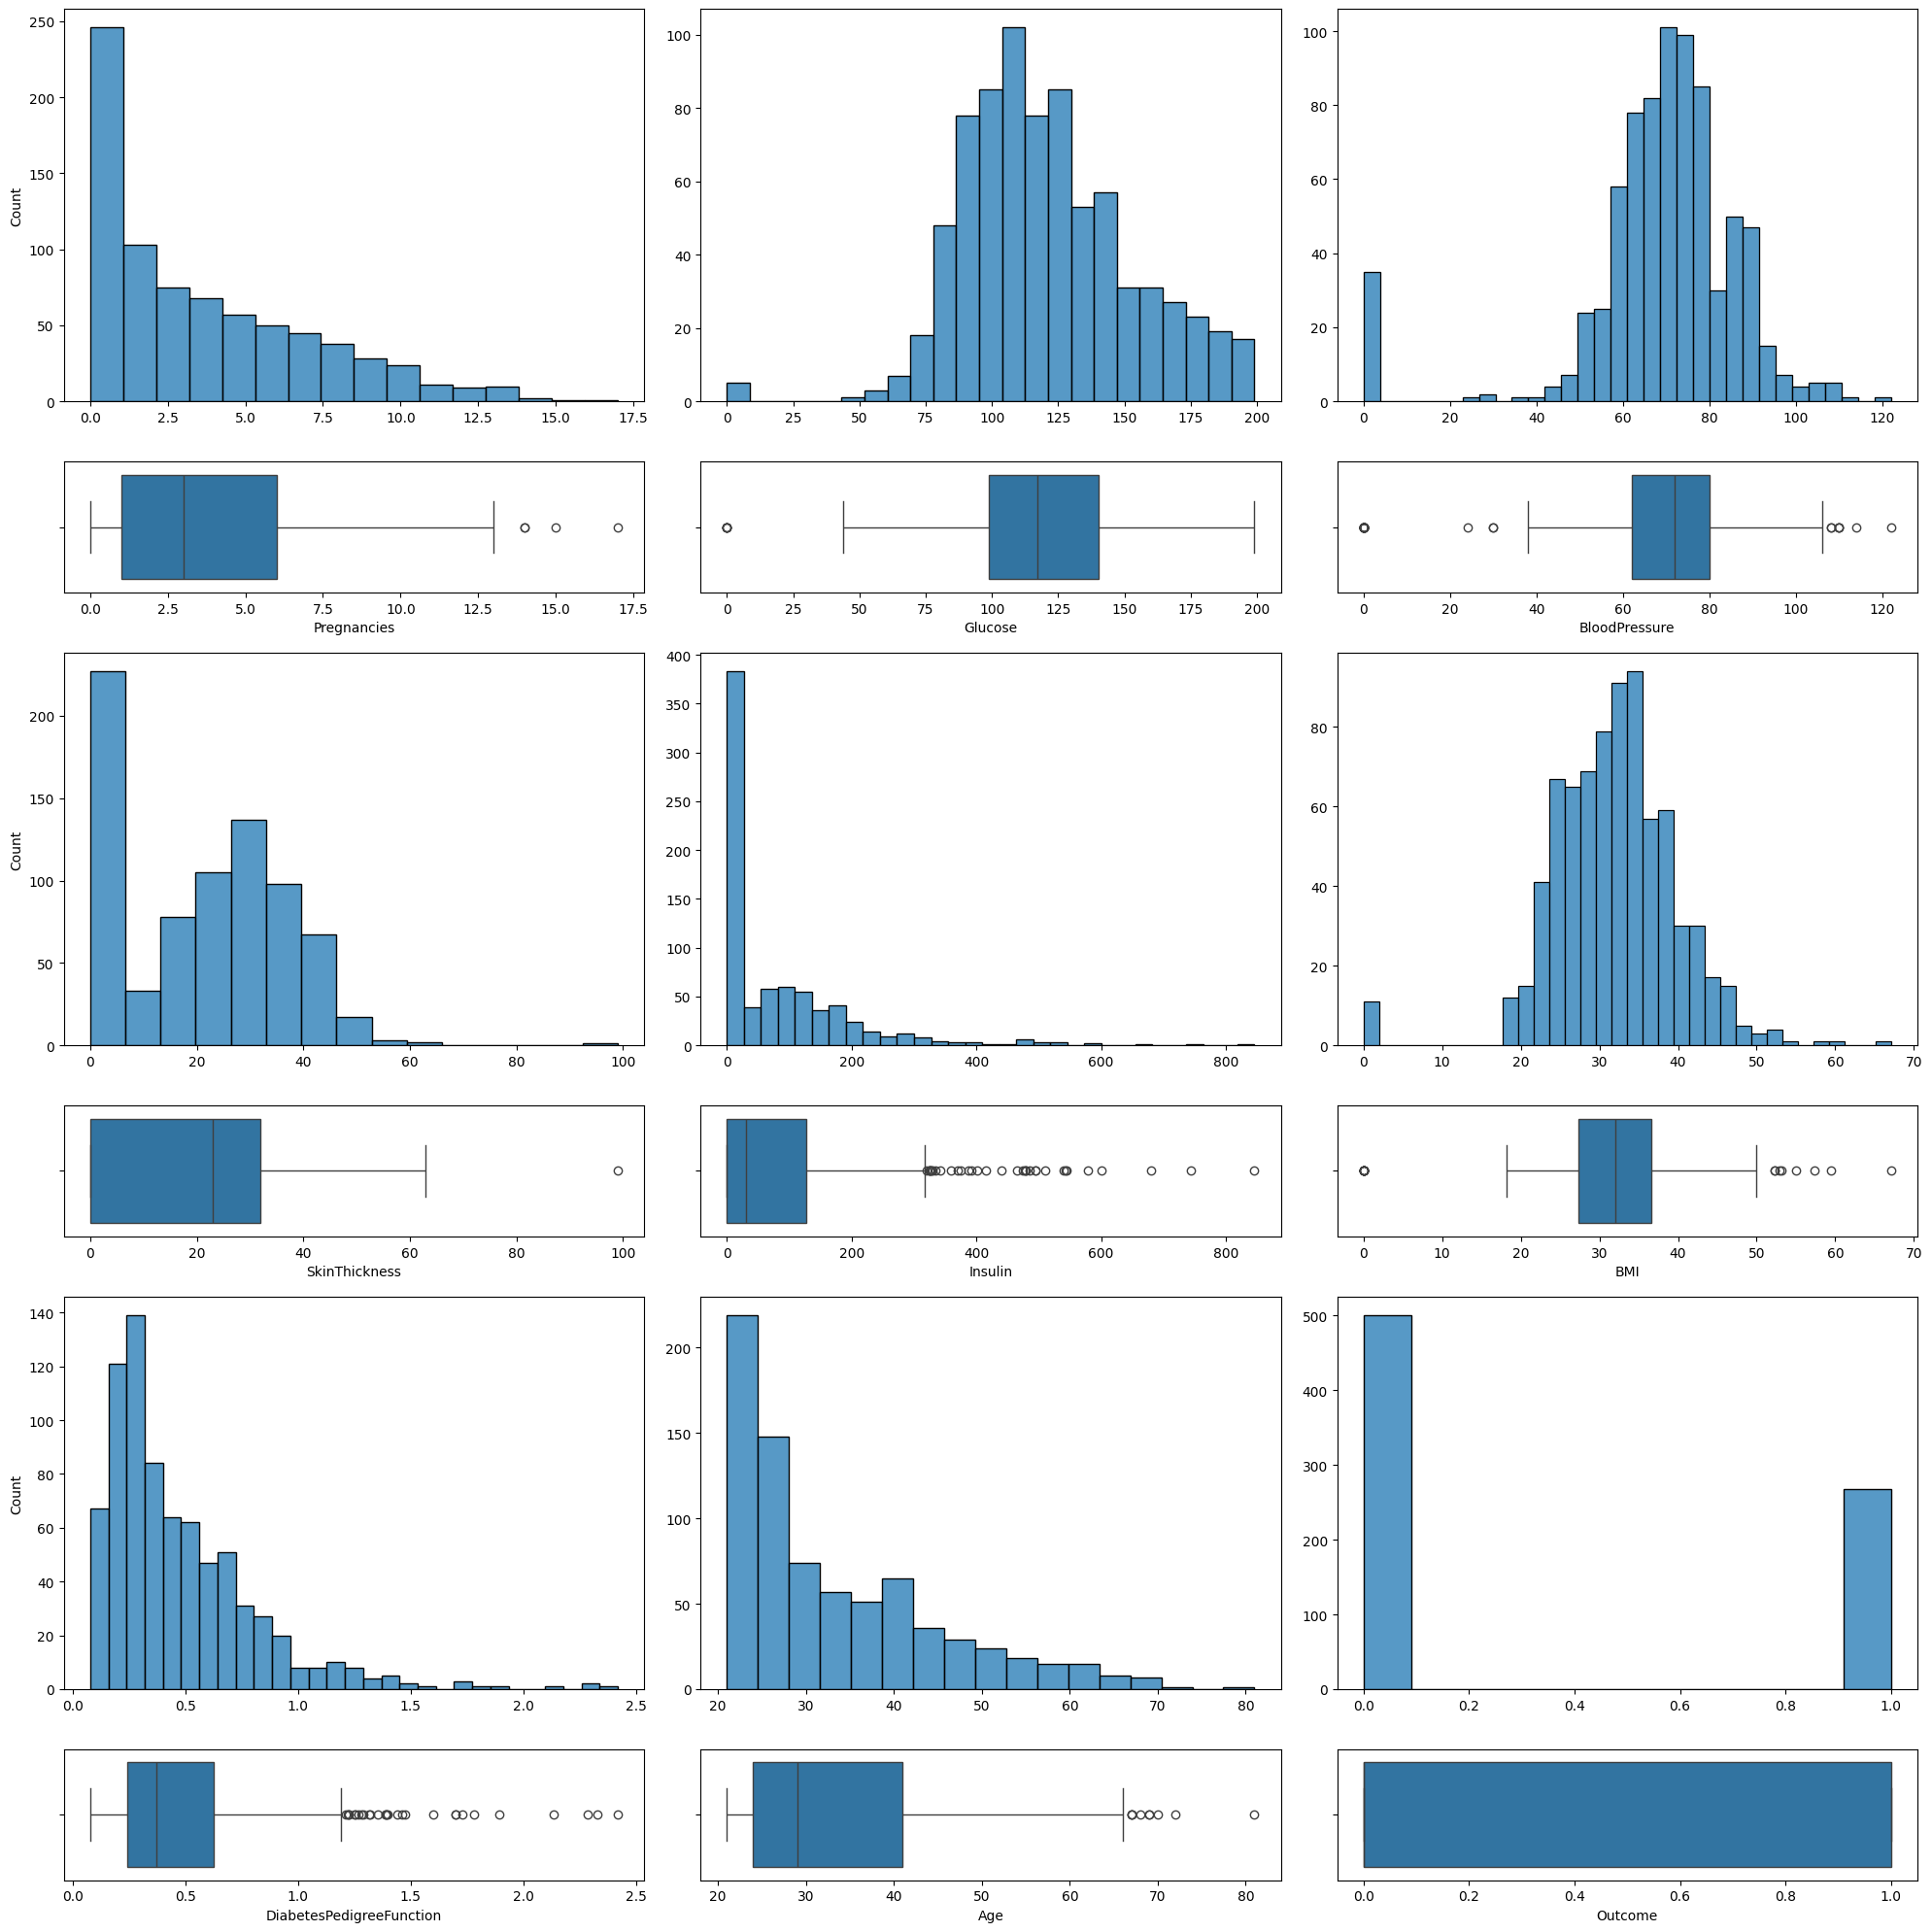

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(6, 3, figsize = (20, 20), gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})

sns.histplot(ax = axis[0,0], data = dataframe, x = 'Pregnancies').set(xlabel = None)
sns.boxplot(ax = axis[1,0], data = dataframe, x = 'Pregnancies')

sns.histplot(ax = axis[0,1], data = dataframe, x = 'Glucose').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = dataframe, x = 'Glucose')

sns.histplot(ax = axis[0,2], data = dataframe, x = 'BloodPressure').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,2], data = dataframe, x = 'BloodPressure')

###

sns.histplot(ax = axis[2,0], data = dataframe, x = 'SkinThickness').set(xlabel = None)
sns.boxplot(ax = axis[3,0], data = dataframe, x = 'SkinThickness')

sns.histplot(ax = axis[2,1], data = dataframe, x = 'Insulin').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,1], data = dataframe, x = 'Insulin')

sns.histplot(ax = axis[2,2], data = dataframe, x = 'BMI').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,2], data = dataframe, x = 'BMI')

###

sns.histplot(ax = axis[4,0], data = dataframe, x = 'DiabetesPedigreeFunction').set(xlabel = None)
sns.boxplot(ax = axis[5,0], data = dataframe, x = 'DiabetesPedigreeFunction')

sns.histplot(ax = axis[4,1], data = dataframe, x = 'Age').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5,1], data = dataframe, x = 'Age')

sns.histplot(ax = axis[4,2], data = dataframe, x = 'Outcome').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5,2], data = dataframe, x = 'Outcome')

###

plt.tight_layout()

plt.show()

In [25]:
dataframe.query("BloodPressure == 0")['BloodPressure'].value_counts()

BloodPressure
0    35
Name: count, dtype: int64

In [26]:
dataframe.query("BMI == 0")['BMI'].value_counts()

BMI
0.0    11
Name: count, dtype: int64

No tiene sentido real, que el BMI y la Presión sanguínea de una persona sea cero.

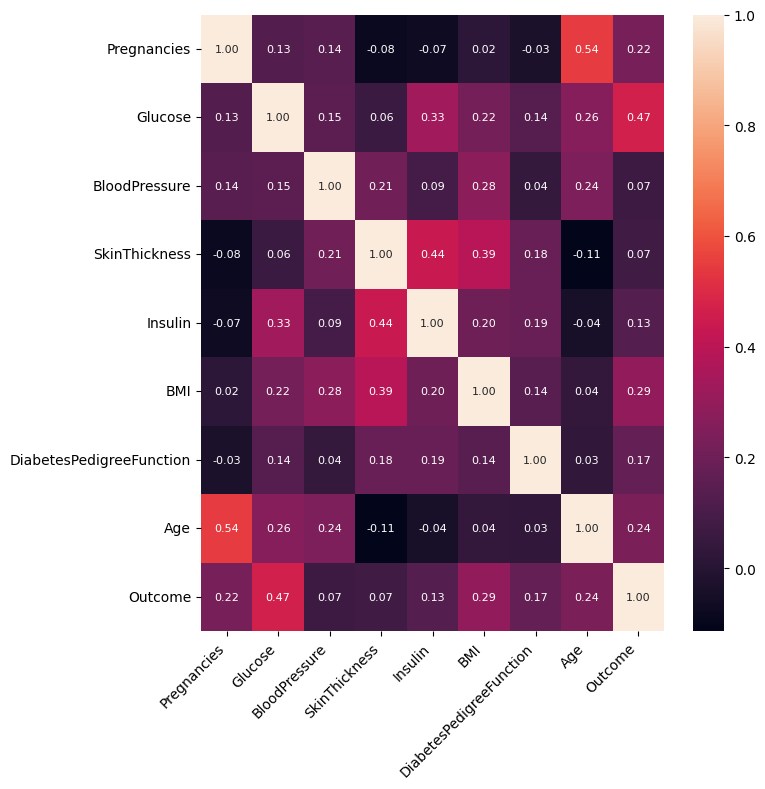

In [27]:
plt.figure(figsize = (8,8))

corr = dataframe[dataframe.columns.tolist()].corr()

sns.heatmap(corr, annot = True, fmt = ".2f", annot_kws={'size': 8})

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Existe correlación significativa entre el número de embarazos y la edad.
- Existe correlación significativa entre el nivel de glucosa y ser o no diabético.
- Existe correlación significativa entre el nivel de insulina y grosor del pliegue cutáneo del tríceps.
- Existe correlación significativa entre el índice de masa corporal y grosor del pliegue cutáneo del tríceps.

In [28]:
mediana_blood_pressure = dataframe['BloodPressure'].median()
mediana_bmi = dataframe['BMI'].median()

# Reemplaza los valores iguales a cero por la mediana

dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(0, mediana_blood_pressure)
dataframe['BMI'] = dataframe['BMI'].replace(0, mediana_bmi)

In [29]:
#Primero se separan los conjuntos de train y test
from sklearn.model_selection import train_test_split

X = dataframe.drop(['Outcome'], axis = 1)
y = dataframe['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
# Seleccionar las variables más relevantes
from sklearn.feature_selection import f_regression, SelectKBest

k = int(len(X_train.columns)*0.15)

selection_model = SelectKBest(f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print(X_train.columns)

Index(['TOT_POP', '0-9', '19-Oct', '40-49', 'POP_ESTIMATE_2018',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Civilian_labor_force_2018', 'Total Population',
       'county_pop2018_18 and older', 'anycondition_number',
       'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number'],
      dtype='object')


In [88]:
columnas_deseadas = X_train.columns.tolist()
columnas_deseadas.append(y_train.name)
dataframe = dataframe[columnas_deseadas]

- ### Análisis Numérico-Numérico completo:

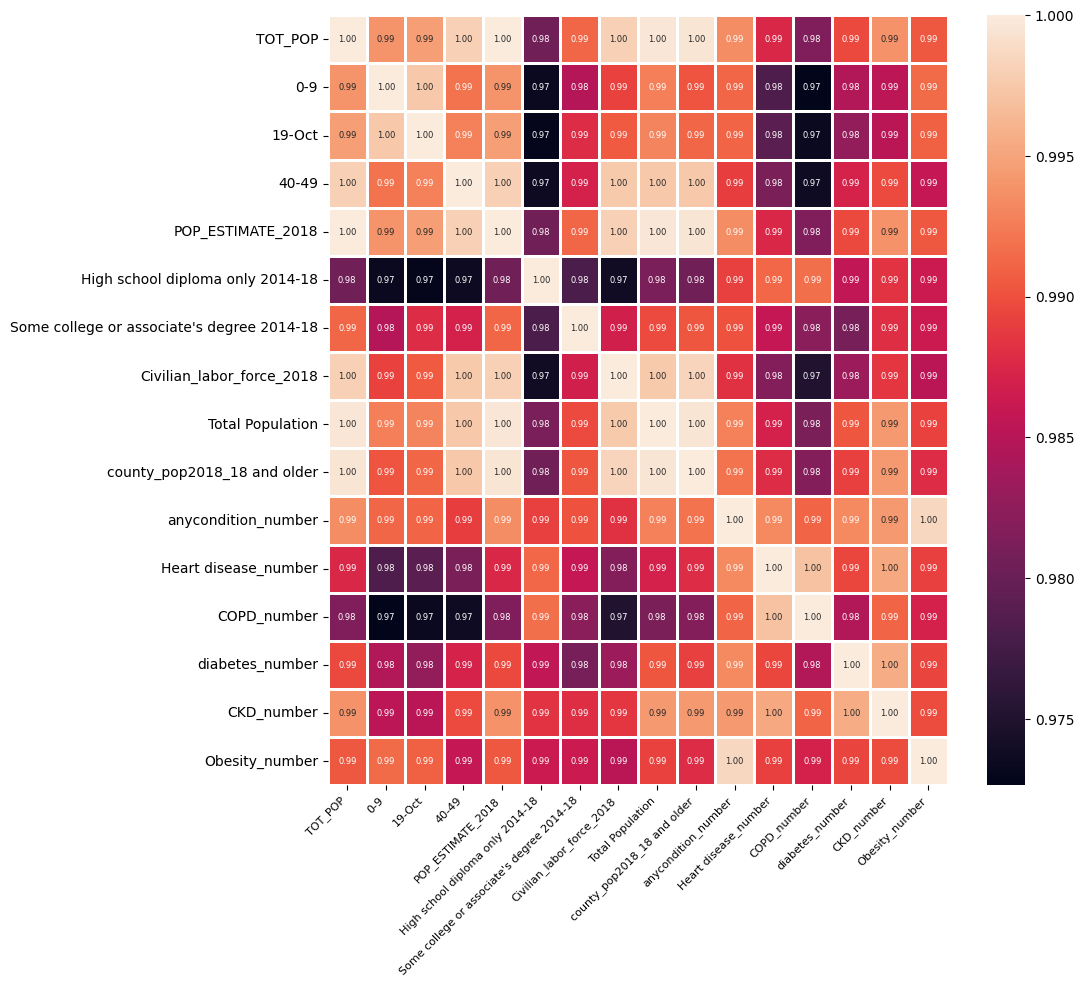

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
corr = dataframe[dataframe.columns.tolist()].corr()

sns.heatmap(corr, annot = True, fmt = ".2f", annot_kws={'size': 6}, linewidths=2)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()

- Existe alto nivel de correlación lineal en todos los casos, por lo cual la existencia de multicolinealidad llevaría a usar el modelo Ridge, sin embargo, se usarán Lasso y Ridge en su forma estándar para evaluar cuál tiene mejor rendimiento.


In [90]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

modelos = {'Linear': LinearRegression(),
           'Lasso': Lasso(),
           'Ridge': Ridge()
}

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def prueba_modelos(modelos, X_train, X_test, y_train, y_test):

  result_training_r2 = {}
  root_error = {}

  for names, model in modelos.items():

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    result_training_r2[names] = r2_score(y_test, y_predict)
    root_error[names] = np.sqrt(mean_squared_error(y_test, y_predict))

  return result_training_r2, root_error

In [92]:
result_training_r2, root_error = prueba_modelos(modelos, X_train, X_test, y_train, y_test)

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.146e+09, tolerance: 1.602e+09
  model = cd_fast.enet_coordinate_descent(


In [93]:
print('Raiz del error cuadrático medio:')
print(root_error)
print()
print("Coef. de determinación")
print(result_training_r2)

Raiz del error cuadrático medio:
{'Linear': 2266.708342768184, 'Lasso': 2415.653351680856, 'Ridge': 2440.225748470749}

Coef. de determinación
{'Linear': 0.9976502361217101, 'Lasso': 0.9973312852083288, 'Ridge': 0.997276715915959}


El error más bajo fue en el modelo Lasso, y el coef. de determinación fue el segundo mejor. Se buscará optimizarlo.

In [94]:
prueba_alpha = list(range(21))

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.405e+09, tolerance: 1.602e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.107e+09, tolerance: 1.602e+09
  model = cd_fast.enet_coordinate_descent(
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.621e+09, tolerance: 1.602e+09
  model = cd_fast.enet_coordinate_descent(
/workspaces/EDA/EDA-env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

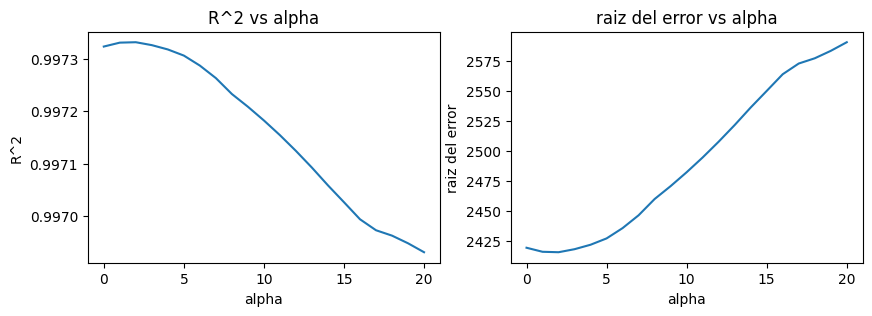

In [95]:
r2 = []
error = []

for i in prueba_alpha:

    model = Lasso(alpha = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    r2.append(r2_score(y_test, y_predict))
    error.append(np.sqrt(mean_squared_error(y_test, y_predict)))

fig, axis = plt.subplots(1, 2, figsize=(10,3))

axis[0].plot(prueba_alpha, r2)
axis[0].set_title('R^2 vs alpha')
axis[0].set_xlabel('alpha')
axis[0].set_ylabel('R^2')

axis[1].plot(prueba_alpha, error)
axis[1].set_title('raiz del error vs alpha')
axis[1].set_xlabel('alpha')
axis[1].set_ylabel('raiz del error')

plt.show()

In [96]:
r2_maximo = max(r2)
indice_r2_maximo = r2.index(r2_maximo)
alpha_maximo = prueba_alpha[indice_r2_maximo]
print(f'El R^2 maximo fue de {r2_maximo} y el valor alpha correspondiente fue de {alpha_maximo}')

El R^2 maximo fue de 0.9973320902756027 y el valor alpha correspondiente fue de 2


In [97]:
error_min = min(error)
indice_error_min = error.index(error_min)
alpha_min = prueba_alpha[indice_error_min]
print(f'La raiz del error cuadratico medio minimo fue de {error_min} y el valor alpha correspondiente fue de {alpha_min}')

La raiz del error cuadratico medio minimo fue de 2415.288960897156 y el valor alpha correspondiente fue de 2


Por lo visto anteriormente, para el valor de alpha 2, el modelo presento un mejor R^2 y se minimiza el error. Es allí donde el modelo se optimiza.

In [101]:
error_base = root_error['Lasso']
r2_base = result_training_r2['Lasso']

print(f'La diferencia entre R^2 base y optimizado fue de {r2_base - r2_maximo}')
print(f'La diferencia entre RMSE base y optimizado fue de {error_base - error_min}')

La diferencia entre R^2 base y optimizado fue de -8.05067273845772e-07
La diferencia entre RMSE base y optimizado fue de 0.36439078369994604


Esto demuestra que para el modelo optimizado, el R^2 aumentó y que además el RMSE disminuyó.